# TITANIC SURVIVAL PREDICTION

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [141]:
train=pd.read_csv('/home/himank/Documents/python/pyth workshop/titanic/train.csv')
test=pd.read_csv('/home/himank/Documents/python/pyth workshop/titanic/test.csv')

In [142]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
train=train.interpolate(method='linear')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


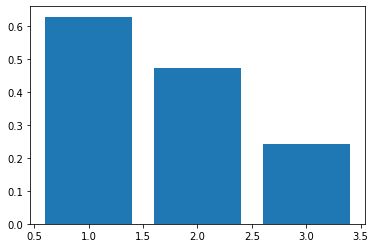

In [144]:
#Better Passenger class had better survial mean
cls=train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()
plt.bar(cls['Pclass'],cls['Survived'])
cls

,Sex,Survived
0,female,0.742038
1,male,0.188908


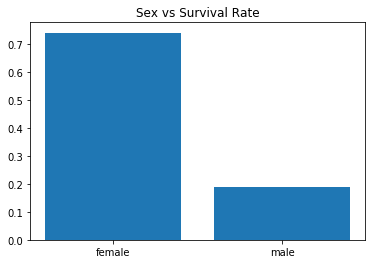

In [145]:
# Females have significantly higher survival rate
df=train[['Sex','Survived']].groupby('Sex',as_index=False).mean()
plt.bar(df['Sex'],df['Survived'])
plt.title("Sex vs Survival Rate")
df

Text(0, 0.5, 'Number')

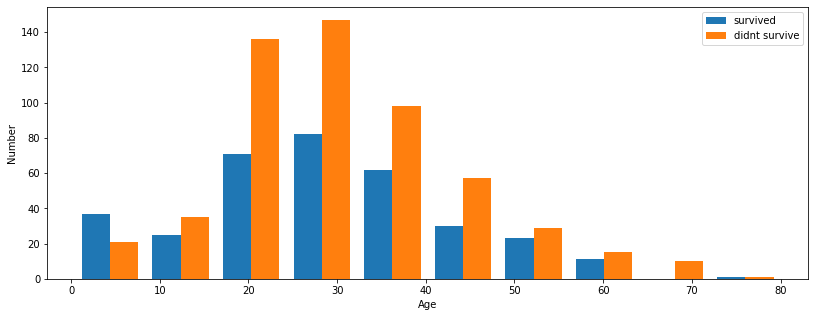

In [146]:
from matplotlib.pyplot import figure
plt.figure(figsize=(30,5))
# Very Young people had better survival rate and veryold people had very less survival rate
df=pd.DataFrame({'Age':pd.cut(train['Age'],5,labels=['very young','young','adults','old','very old']),'Survived':train['Survived']})
df.groupby('Age',as_index=False).mean()
plt.subplot(1,2,1)
plt.hist([train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],label=['survived','didnt survive'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number')

In [147]:
# More siblings tend to result in less survival rate
train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


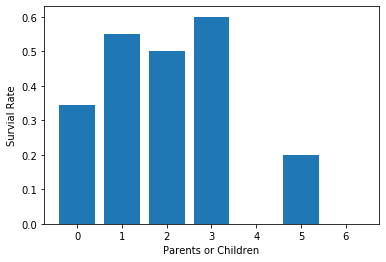

In [148]:
# Having Parents or Children has slightly better rate
df=train[['Parch','Survived']].groupby('Parch',as_index=False).mean()

plt.bar(df['Parch'],df['Survived'])
plt.xlabel('Parents or Children')
plt.ylabel('Survial Rate')
df

,Fare,Survived
0,Cheap,0.376579
1,Mediocre,0.647059
2,Expensive,1.000000


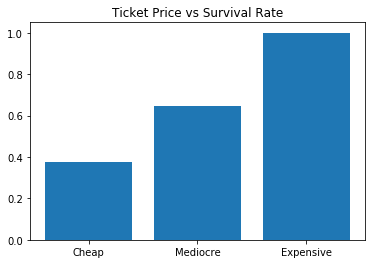

In [149]:
#In general More expensive ticket has better survival rate.
df=pd.DataFrame({'Fare':pd.cut(train['Fare'],3,labels=['Cheap','Mediocre','Expensive']),'Survived':train['Survived']})
df=df.groupby('Fare',as_index=False).mean()
plt.bar(df['Fare'],df['Survived'])
plt.title("Ticket Price vs Survival Rate")
df

In [150]:

#Cabin has too many missing values to be a useful feature
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


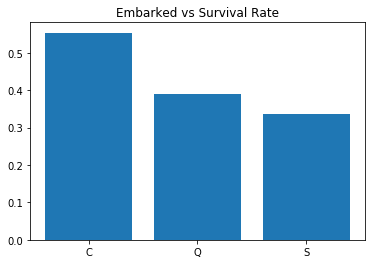

In [151]:
# Embarkment C seems to have bette survival rate
df=train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
plt.bar(df['Embarked'],df['Survived'])
plt.title("Embarked vs Survival Rate")
df

# Predictive Modelling:

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [153]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
x=train.iloc[:,[2,4,5,6,7,9,11]]
y=train.iloc[:,[1]]
test_x=test.iloc[:,[1,3,4,5,6,8,10]]

In [155]:
x.loc[:,'Embarked']=x.loc[:,'Embarked'].fillna(x.loc[:,'Embarked'].value_counts().index[0])
test_x.loc[:,'Embarked']=test_x.loc[:,'Embarked'].fillna(test_x.loc[:,'Embarked'].value_counts().index[0])


/home/himank/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [156]:
le=LabelEncoder()
le.fit(x['Sex'])
x.loc[:,'Sex']=le.transform(x.Sex)
test_x.loc[:,'Sex']=le.transform(test_x.Sex)

In [157]:
le2=LabelEncoder()
le2.fit(x['Embarked'])

x.loc[:,'Embarked']=le2.transform(x['Embarked'])
test_x.loc[:,'Embarked']=le2.transform(test_x['Embarked'])


In [158]:
#from impyute.imputation.cs import mice
#cols=list(x.columns)
#x=pd.DataFrame(mice(x))
#x.columns=cols
import re
title=[]
for i in (train['Name']):
    title.append(re.search('Mr\.|Mrs\.|Dona\.|Miss\.|Master\.|Don\.|Rev\.|Jonkheer\.|Dr\.|Mme\.|Ms\.|Major\.|Lady\.|Sir\.|Mlle\.|Col\.|Capt\.|Countess\.',i).group())
x.loc[:,'title']=title
 
title=[]
for i in (test['Name']):
    title.append(re.search('Mr\.|Mrs\.|Dona\.|Miss\.|Master\.|Don\.|Rev\.|Jonkheer\.|Dr\.|Mme\.|Ms\.|Major\.|Lady\.|Sir\.|Mlle\.|Col\.|Capt\.|Countess\.',i).group())
test_x.loc[:,'title']=title


dict1=x.groupby('title')['Age'].median()
dict2=test_x.groupby('title')['Age'].median()
dict2['Ms.']=dict2['Miss.']
x.loc[:,'Age']=x.Age.fillna(x.loc[:,'title'].map(dict1))
test_x.loc[:,'Age']=test_x.Age.fillna(test_x.loc[:,'title'].map(dict2))

/home/himank/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [159]:

test_x.loc[:,'Fare'].fillna(np.median(test_x[test_x.Pclass==3].loc[:,'Fare'].dropna()),inplace=True)


/home/himank/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [160]:
#x['Pclass']=x.Pclass.astype(int)
#x['Sex']=x.Sex.astype(int)
#x['Embarked']=x.Embarked.astype(int)
#x['Parch']=x.Parch.astype(int)
#x['SibSp']=x.SibSp.astype(int)
x=x.iloc[:,:-1]
test_x=test_x.iloc[:,:-1]

In [161]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [162]:
lrmodel=LogisticRegression(solver='liblinear')
lrmodel.fit(X_train,Y_train.values)


/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
df=pd.DataFrame({'Feature':x.columns})
df['Corr']=lrmodel.coef_[0]
print(df)
accuracy_score(Y_test,lrmodel.predict(X_test))

    Feature      Corr
0    Pclass -0.738510
1       Sex -2.439828
2       Age -0.023904
3     SibSp -0.266719
4     Parch -0.071030
5      Fare  0.004732
6  Embarked -0.127258


0.8268156424581006

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=8)
rf.fit(X_train,Y_train)
accuracy_score(rf.predict(X_test),Y_test)

/home/himank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8435754189944135

In [165]:
df=pd.DataFrame(test.PassengerId)
df['Survived']=rf.predict(test_x)

df.to_csv("/home/himank/Documents/python/pyth workshop/titanic/submission.csv",index=False)